# Assignment 6
## Jill Straat
## s4062116
## Problem 1

In [1]:
from math import pi, e
from scipy.special import erf, gammainc
import numpy as np
def gamma(s, x):
    if s == 1:
        return(1-e**(-x))
    elif s == 0.5:
        return (pi**0.5 *erf(x**0.5))
    else:
        s = s-1
        return (s*gamma(s, x)-x**s * e**(-x))

def Gamma(s):
    if s == 1:
        return 1
    elif s == 0.5:
        return pi**0.5
    else:
        s = s-1
        return (s*Gamma(s))
    
def P(s, x):
    g = gamma(s, x)
    G = Gamma(s)
    return g/G

S = np.linspace(0.5, 4, 8)

print(" Own function            gammainc")
for i in S:
    p = P(i, 2)
    q = gammainc(i,2)
    print(" {}    {}".format(p, q))

 Own function            gammainc
 0.9544997361036416    0.9544997361036415
 0.8646647167633873    0.8646647167633873
 0.7385358700508893    0.7385358700508888
 0.5939941502901619    0.5939941502901616
 0.4505840486472195    0.4505840486472198
 0.3233235838169365    0.32332358381693654
 0.22022259152428383    0.22022259152428406
 0.14287653950145288    0.14287653950145296


## Problem 2
Sample variance is given by
$$S_n^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \overline{x_n})^2$$
where $x_i$ is our data point, $x_n$ the value predicted by the power law and $n$ the number of data points.

In [2]:
def powerlaw(x, S0, SI):
    """We can take v_0 and v in Hz, MHz or even mHz, because the 10^x will cancel in the ratio"""
    v0 = 160
    return(S0*(x/v0)**SI)

def samplevar(x, S0, SI, data):
    n = len(data)
    xn = powerlaw(x, S0, SI)
    return (np.sum((data-xn)**2)/(n-1))
    

A = np.array([0.80, 1.24, 1.15, 0.75])
B = np.array([2.51, 1.94, 1.66, 1.29])
v = np.array([100, 140, 180, 220])

print("The most prbable estimate for the sample variance for A is {:.4}".format(samplevar(v, 1.3, -0.4, A)))
print("The most prbable estimate for the sample variance for B is {:.4}".format(samplevar(v, 1.8, -0.7, B)))

The most prbable estimate for the sample variance for A is 0.2574
The most prbable estimate for the sample variance for B is 0.008001


## Problem 3
$\chi^2$ value is given by:
$$\chi^2 = \sum_{k=1} ^N \left(\frac{F_k-D_k}{\sigma_k}\right)^2$$

In [3]:
def chi(x, S0, SI, data, sigma):
    F = powerlaw(x, S0, SI)
    D = data
    return np.sum(((F-D)/sigma)**2)
print("The Chi squared value for source A is {:.4}".format(chi(v, 1.3, -0.4, A, 0.1)))
print("The Chi squared value for source B is {:.4}".format(chi(v, 1.8, -0.7, B, 0.1)))

The Chi squared value for source A is 77.22
The Chi squared value for source B is 2.4


$\chi^2$ states the goodness of fit of the model/parameters. In general one can say that a lower value of $\chi^2$ resembles a better fit. Hence we can conclude that the parameters for B match the data collected by source B better than the parameters for A match the data form source A.

## Problem 4)
In the booklet we find that the degrees of freedom are given by:
$$ k = N-M$$
Where N is the amount of measurements and M the amount of parameters.

p-value is given by:
$$p(x|k) = 1-P\left(\frac{k}{2},\frac{\chi^2}{2}\right)$$
In eq.1 we have to fit two parameters, $S_0$ and $SI$.

In [4]:
def Pval(x, S0, SI, data, sigma, M):
    k = len(data)-M
    X = chi(x, S0, SI, data, sigma)
    p = P(k/2, X/2)
    return 1-p, k

p = Pval(v, 1.3, -0.4, A, 0.1,2)
q = Pval(v, 1.8, -0.7, B, 0.1,2)
print("The degrees of freedom are given by k={}".format(p[1]))
print("The p-value for source A is {}".format(p[0]))
print("The p-value for source B is {:.4}".format(q[0]))

The degrees of freedom are given by k=2
The p-value for source A is 0.0
The p-value for source B is 0.3012


the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis. 

This means that we need to find another model for source A, since $p=0$. And that the model for source B is pretty reliable, because $p=0.3$

## Problem 5
$$ c_i = b_i\sqrt{1.0-q^2}-qa_i$$
Covariance is given by:
$$\langle(x-\langle x\rangle)(y-\langle y\rangle)\rangle$$
And the linear correlation coefficient is given by:
$$\rho = \frac{covariance}{\sigma_x\sigma_y}$$

q= 0.8037992484609013
The linear correlation coefficient ρ(a, -a)=-1.0
The linear correlation coefficient ρ(a, b)=-0.00101
The linear correlation coefficient ρ(a, c)=-0.803


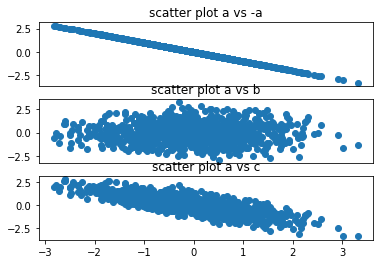

In [8]:
import random
import matplotlib.pyplot as plt

def covar(Y1, Y2):
    cov = np.mean((Y1-np.mean(Y1))*(Y2-np.mean(Y2)))
    return cov

def corcoef(Y1, Y2):
    c = covar(Y1, Y2)
    s1 = np.std(Y1)
    s2 = np.std(Y2)
    return c/(s1*s2)

a = np.random.normal(size=1000)
b = np.random.normal(size=1000)
q = random.uniform(0.3, 0.9)
c = b*(1.0-q**2)**0.5 - q*a

print("q=", q)
fig, axs = plt.subplots(3)
# a vs -a
axs[0].scatter(a, -a,)
axs[0].set_title('scatter plot a vs -a')
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
print("The linear correlation coefficient ρ(a, -a)={:.3}".format(corcoef(a, -a)))

# a vs b
axs[1].scatter(a,b)
axs[1].set_title('scatter plot a vs b')
axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
print("The linear correlation coefficient ρ(a, b)={:.3}".format(corcoef(a, b)))

# a vs c
axs[2].scatter(a,c)
axs[2].set_title('scatter plot a vs c')
print("The linear correlation coefficient ρ(a, c)={:.3}".format(corcoef(a, c)))
plt.show()

The linear correlation coefficient can have values between $-1$ and $1$. $\rho=0$ means that the parameters do not correlate, $0<\rho<1$ means the parameters correlate and $-1<\rho<0$ means the parameters anticorrelate.
The closer $|\rho|$ is to $1$ the stronger the correlation as you can see in the plot and from the values. 

This means $a$ and $-a$ anticorrelate strongly since $\rho=-1$, which is also logical since this is almost the defination of anticorrelation. 

$a$ and $b$ correlate to a very low degree, since $\rho\approx 0$, which is logical since they are independent generated lists. However, they are both generated by a normal distribution, so they might correlate a bit as we see here.

$a$ and $c$ anticorrelate to a intermediate degree, since $\rho\approx 0,5$. This is also logical when you take a look at the function describing c, which states that $c$ goes down when $a$ goes up.